# <u>Exploring AirBnB in Athens</u> 
### Analytics Practicum I
### Assignment I
### Professor: Panos Louridas 
### <font color="blue">***Eleni Ralli   (ID:f2822312)*** </font>    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
# Setting the current working directory
relative_path = os.getcwd()
relative_path

'C:\\Users\\eleni\\Analytics Practicum I -louridas\\assignment'

#### For this assignment, we will explore the impact of the AirBnB platform in Athens using data from Inside AirBnB. After downloading the data for Athens, we will spend time getting familiar with it and then proceed to perform certain tasks.

In [3]:
# Φόρτωση των αρχείων δεδομένων
listings_detailed_df = pd.read_csv(os.path.join(relative_path, 'listings.csv.gz'))
calendar_detailed_df = pd.read_csv(os.path.join(relative_path, 'calendar.csv.gz'))
reviews_detailed_df = pd.read_csv(os.path.join(relative_path, 'reviews.csv.gz'))
listings_summary_df = pd.read_csv(os.path.join(relative_path, 'listings.csv'))
reviews_summary_df = pd.read_csv(os.path.join(relative_path, 'reviews.csv'))
neighbourhoods_df = pd.read_csv(os.path.join(relative_path, 'neighbourhoods.csv'))

In [4]:
import geopandas as gpd  #!conda install -c conda-forge geopandas --yes   before import , install 
neighbourhoods_geojson_df = gpd.read_file(os.path.join(relative_path, 'neighbourhoods.geojson'))

#### Below, we will run some commands to inspect the contents of each DataFrame we created and get an initial understanding of the nature of our data.

### <font color="blue"> 1. For the listings_detailed_df : </font>  

In [5]:
listings_detailed_df.shape

(13182, 75)

In [6]:
listings_detailed_df[['id', 'name', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']]

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
0,40042598,Rental unit in Athina · 1 bedroom · 1 bed · 1 ...,158884228,NaN,37.994430,23.736880,Private room,$20.00,1,0,NaN
1,39069205,Rental unit in Athina · 2 bedrooms · 2 beds · ...,299446668,"Athina, Greece",37.979190,23.745320,Entire home/apt,$293.00,2,0,NaN
2,653274914834812593,Condo in Athina · ★5.0 · 1 bedroom · 2 beds · ...,272702874,"Athina, Greece",37.966000,23.727170,Entire home/apt,$60.00,1,47,2.68
3,54361219,Rental unit in Athina · ★4.75 · 1 bedroom · 1 ...,433120301,NaN,37.975890,23.732750,Entire home/apt,$93.00,1,40,1.83
4,51258073,Rental unit in Athina · ★5.0 · Studio · 3 beds...,199937958,NaN,37.979220,23.724700,Entire home/apt,$119.00,2,9,0.31
...,...,...,...,...,...,...,...,...,...,...,...
13177,36905271,Boutique hotel in Athina · 1 bedroom · 1 bed ·...,48654793,"Athina, Greece",37.976180,23.729610,Hotel room,$151.00,1,0,NaN
13178,21695325,Loft in Athens · ★4.73 · 1 bedroom · 1 bed · 1...,41042574,"Athens, Attica, Greece",37.975580,23.731610,Entire home/apt,$54.00,1,168,2.29
13179,651256549439046547,Rental unit in Athina · 1 bedroom · 2 beds · 1...,67295649,"Athina, Greece",37.976860,23.728940,Entire home/apt,$214.00,1,0,NaN
13180,736573771699647347,Condo in Athina · ★5.0 · 1 bedroom · 1 bed · 1...,443865000,"Athina, Greece",37.974289,23.732126,Entire home/apt,$60.00,2,4,0.28


# 



### <font color="blue"> 2. For the calendar_detailed_df : </font>


In [7]:
calendar_detailed_df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [8]:
print(calendar_detailed_df[['listing_id', 'date', 'available', 'price']])

                  listing_id        date available    price
0                      10595  2023-12-25         f  $180.00
1                      10595  2023-12-26         f  $180.00
2                      10595  2023-12-27         f  $180.00
3                      10595  2023-12-28         f  $180.00
4                      10595  2023-12-29         f  $180.00
...                      ...         ...       ...      ...
4812167  1052831358961926209  2024-12-19         f   $90.00
4812168  1052831358961926209  2024-12-20         f   $90.00
4812169  1052831358961926209  2024-12-21         f   $90.00
4812170  1052831358961926209  2024-12-22         f   $90.00
4812171  1052831358961926209  2024-12-23         f   $90.00

[4812172 rows x 4 columns]


#   


### <font color="blue"> 3. For the reviews_detailed_df : </font>


In [9]:
reviews_detailed_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [10]:
reviews_detailed_df[['listing_id', 'id', 'date', 'comments']]

,listing_id,id,date,comments
0,10595,271535,2011-05-20,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,Fantastic accommodation very well located to v...
...,...,...,...,...
652120,1027501913924137512,1033154620423406499,2023-11-26,Τρομερός χώρος σε πολύ προσιτή τιμή στο κέντρο...
652121,1027501913924137512,1043378550797123889,2023-12-10,"Το κατάλυμα βρίσκεται σε ιδανική περιοχή, πραγ..."
652122,1028286259867636458,1031058218696915023,2023-11-23,This is the most premium AirBnb type property...
652123,1028286259867636458,1031789747353084273,2023-11-24,"An excellent well decorated apartment, in a gr..."


# 

### <font color="blue"> 4. For the listings_summary_df : </font>


In [11]:
listings_summary_df[['id', 'name', 'host_id', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

,id,name,host_id,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,Condo in Athens · ★4.84 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,93.0,1,45,0.29,7,351
1,10990,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,41.0,1,71,0.52,7,343
2,10993,Rental unit in Athens · ★4.83 · Studio · 2 bed...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,42.0,1,93,0.68,7,353
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,48.0,1,30,0.18,7,358
4,27262,Rental unit in Athens · ★4.83 · 1 bedroom · 1 ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,48.0,1,23,0.17,7,360
...,...,...,...,...,...,...,...,...,...,...,...
13177,1041981160570257250,Condo in Athina · ★New · 1 bedroom · 2 beds · ...,550073856,ΝΕΟΣ ΚΟΣΜΟΣ,Entire home/apt,39.0,1,0,NaN,1,241
13178,1041986166054910435,Rental unit in Athina · ★New · 1 bedroom · 2 b...,28624357,ΝΕΟΣ ΚΟΣΜΟΣ,Entire home/apt,56.0,1,0,NaN,2,127
13179,1041995940594177341,Rental unit in Athina · ★New · 2 bedrooms · 2 ...,520807652,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,Entire home/apt,57.0,2,0,NaN,18,264
13180,1042000846383303032,Rental unit in Athina · ★New · 2 bedrooms · 3 ...,180153653,ΚΟΛΩΝΑΚΙ,Entire home/apt,120.0,1,0,NaN,1,264


# 

### <font color="blue"> 5. For the reviews_summary_df : </font>

In [12]:
print(reviews_summary_df[['listing_id', 'date']])


                 listing_id        date
0                     10595  2011-05-20
1                     10595  2012-08-15
2                     10595  2013-05-20
3                     10595  2014-05-04
4                     10595  2014-09-13
...                     ...         ...
652120  1044271259303452816  2023-12-22
652121  1044837847724609002  2023-12-22
652122  1044854083716723786  2023-12-20
652123  1045025263246273195  2023-12-25
652124  1045798883283175139  2023-12-25

[652125 rows x 2 columns]


# 

### <font color="blue"> 6. For the neighbourhoods_df : </font>

In [13]:
neighbourhoods_df.shape

(45, 2)

In [14]:
print(neighbourhoods_df[['neighbourhood']])


                       neighbourhood
0                     1Ο ΝΕΚΡΟΤΑΦΕΙΟ
1                   ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ
2   ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
3                     ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ
4                  ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ
5                           ΑΚΡΟΠΟΛΗ
6                        ΑΜΠΕΛΟΚΗΠΟΙ
7                         ΑΝΩ ΚΥΨΕΛΗ
8                        ΑΝΩ ΠΑΤΗΣΙΑ
9                          ΒΟΤΑΝΙΚΟΣ
10                             ΓΚΑΖΙ
11                             ΓΚΥΖΗ
12                             ΓΟΥΒΑ
13                             ΓΟΥΔΙ
14                       ΕΛΛΗΝΟΡΩΣΩΝ
15            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ
16                           ΖΑΠΠΕΙΟ
17                            ΘΗΣΕΙΟ
18                            ΙΛΙΣΙΑ
19                        ΚΕΡΑΜΕΙΚΟΣ
20                        ΚΟΛΟΚΥΝΘΟΥ
21                          ΚΟΛΩΝΑΚΙ
22                           ΚΟΛΩΝΟΣ
23               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
24                            ΚΥΨΕΛΗ
25                        ΛΥΚΑΒΗΤΤΟΣ
2

# 

### <font color="blue"> 7. For the neighbourhoods_geojson_df : </font>

In [15]:
neighbourhoods_geojson_df.shape

(45, 3)

In [16]:
neighbourhoods_geojson_df[['neighbourhood', 'geometry']].head(10)

,neighbourhood,geometry
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,"MULTIPOLYGON (((23.74251 37.96321, 23.74250 37..."
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,"MULTIPOLYGON (((23.73580 38.02347, 23.73345 38..."
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,"MULTIPOLYGON (((23.72923 37.98885, 23.72855 37..."
3,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,"MULTIPOLYGON (((23.73376 38.00839, 23.73363 38..."
4,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,"MULTIPOLYGON (((23.71199 37.99614, 23.71249 37..."
5,ΑΚΡΟΠΟΛΗ,"MULTIPOLYGON (((23.72432 37.97559, 23.72405 37..."
6,ΑΜΠΕΛΟΚΗΠΟΙ,"MULTIPOLYGON (((23.76916 37.99822, 23.76928 37..."
7,ΑΝΩ ΚΥΨΕΛΗ,"MULTIPOLYGON (((23.74582 38.00798, 23.74663 38..."
8,ΑΝΩ ΠΑΤΗΣΙΑ,"MULTIPOLYGON (((23.73994 38.02293, 23.74302 38..."
9,ΒΟΤΑΝΙΚΟΣ,"MULTIPOLYGON (((23.69862 37.99356, 23.70137 37..."


# 


<div class="alert-info">
we can see that :
    In preparing the analysis of the AirBnB data for Athens, various datasets have been loaded and examined. The 'listings_detailed_df' provides extensive details for each listing, including location, pricing, and reviews, while 'calendar_detailed_df' contains information on availability and pricing on a daily basis. Similarly, 'reviews_detailed_df' gathers reviews for the listings, 'listings_summary_df' provides an overview of the listings, and 'reviews_summary_df' collects the dates of reviews. Additionally, 'neighbourhoods_df' describes the neighborhoods of Athens, and 'neighbourhoods_geojson_df' links neighborhoods with their geometric representation. 
    
#### In the detailed listings DataFrame ('listings_detailed_df'):

- id, listing_url, scrape_id, last_scraped, source: These columns relate to the identity of the listing.
- name, description, neighborhood_overview: Descriptive information about the listing and its neighborhood.
- picture_url, host_id, host_url: Image links and host information.
- host_name, host_since, host_location, host_about: Details about the host.
- host_response_time, host_response_rate: The host's response time and rate.
- host_acceptance_rate, host_is_superhost: The host's acceptance rate and superhost status.
- host_neighbourhood, neighbourhood, neighbourhood_cleansed: Neighborhood details.
- property_type, room_type, accommodates: Type of property and its capacity.
- price, minimum_nights, maximum_nights: Pricing and minimum/maximum night requirements.
- number_of_reviews, review_scores_rating: The number of reviews and overall rating score.
- availability_30, availability_60, availability_90, availability_365: Availability over various time spans.

#### For the calendar detailed DataFrame ('calendar_detailed_df'):

- listing_id, date: The listing's identifier and date.
- available, price, adjusted_price: Availability and pricing information.
- minimum_nights, maximum_nights: Minimum/maximum night requirements.

#### In the reviews detailed DataFrame ('reviews_detailed_df'):

- listing_id, id: Listing identifier and review identifier.
- date, reviewer_id, reviewer_name, comments: Date of the review, reviewer's information, and their comments.

#### The summary listings DataFrame ('listings_summary_df') includes:

- id, name, host_id, host_name: Unique identifiers and names of the listings and hosts.
- neighbourhood_group, neighbourhood: Neighborhood information.
- latitude, longitude: Geographic coordinates.
- room_type: Type of room (e.g., entire home, private room).
- price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365: Price, minimum nights, number of reviews, last review, monthly reviews, total number of host's listings, annual availability.

#### The reviews summary DataFrame ('reviews_summary_df') contains:

- listing_id, date: Listing identifier and the date of the review.

#### For the neighbourhoods DataFrame ('neighbourhoods_df') and neighbourhoods geojson DataFrame ('neighbourhoods_geojson_df'):

- neighbourhood: Name of the neighborhood.
- neighbourhood_group: Neighborhood group, if applicable.
- geometry: Geometric data for mapping the neighborhood.

Each column provides specific data for the Airbnb analysis. For instance, pricing and availability columns offer insights into the market, while information on neighborhoods and hosts helps understand the geographical distribution and the nature of the listings.  
    
</div>

# 

### <font color="blue"> (Ι) Neighbourhood Listings in Descending Order : </font>
####  the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

#####  <font color="grey"> To display Airbnb listings per neighborhood in descending order of popularity, we follow these steps: </font>
* ##### <font color="grey"> We choose listings_summary_df  dataframe because it contains compact information about listings, including neighborhood data.</font>

##### <font color="grey"> after that we do the followings : </font>

* ##### <font color="grey">Calculate the Number of Listings Per Neighborhood: </font>
<font color="grey"> We use value_counts() on the neighbourhood column of listings_summary_df. This returns a series with neighborhoods and their corresponding number of listings.</font>

* ##### <font color="grey"> Sort in Descending Order: </font>
<font color="grey">value_counts() sorts the results in descending order by default, but we explicitly sort again for clarity using sort_values(ascending=False).</font>

* ##### <font color="grey"> Convert to DataFrame:</font>
<font color="grey"> To add column names, we convert the sorted series to a DataFrame. The reset_index() method transforms the series into a DataFrame, where the neighborhood names become one column, and their counts become another.</font>

* ##### <font color="grey"> Rename Columns and Display: </font>
<font color="grey"> We rename the columns to 'Neighbourhood' and 'Number of Listings' for clarity and then display the DataFrame.</font>



# 

In [17]:
# Calculating the number of listings per neighborhood
neighbourhood_counts = listings_summary_df['neighbourhood'].value_counts()

# Sorting in descending order
neighbourhood_counts_sorted = neighbourhood_counts.sort_values(ascending=False)

# Converting to a dataframe to add column names
neighbourhood_counts_sorted_df = neighbourhood_counts_sorted.reset_index()
neighbourhood_counts_sorted_df.columns = ['Neighbourhood', 'Number of Listings']

# Displaying the dataframe 
print(neighbourhood_counts_sorted_df)

                       Neighbourhood  Number of Listings
0             ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                2455
1                ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                1137
2                        ΝΕΟΣ ΚΟΣΜΟΣ                1004
3           ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ                 987
4   ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ                 830
5                    ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                 590
6                           ΠΑΓΚΡΑΤΙ                 529
7                        ΑΜΠΕΛΟΚΗΠΟΙ                 461
8                           ΚΟΛΩΝΑΚΙ                 427
9                             ΘΗΣΕΙΟ                 397
10                          ΑΚΡΟΠΟΛΗ                 395
11                         ΠΕΤΡΑΛΩΝΑ                 376
12                        ΚΕΡΑΜΕΙΚΟΣ                 352
13                            ΚΥΨΕΛΗ                 279
14                            ΣΤΑΔΙΟ                 249
15                             ΓΟΥΔΙ                 240
16                            Ι


<div class="alert-info">
we can see that :
 From the provided AirBnB data, we observe that the "ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ" area is the most popular neighborhood in Athens with 2,455 listings, followed by "ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ" with 1,137 listings, and "ΝΕΟΣ ΚΟΣΜΟΣ" with 1,004 listings. This indicates a concentration of tourist activity and available rentals in these areas, which are likely to attract visitors due to their proximity to significant attractions and their historical and cultural importance. Their high ranking suggests that these neighborhoods are highly preferred by visitors using the AirBnB platform to find accommodations in the city. Conversely, areas such as "ΡΗΓΙΛΛΗΣ" and "ΠΕΝΤΑΓΩΝΟ" show a much lower number of listings, which may reflect lesser tourist or commercial activity.
</div>

# 

### <font color="blue"> (ΙΙ) Neighbourhood Prices in Descending Order : </font>

####  a table with the prices per neighbourhood. The prices information contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table are descending median prices
    
    
    

    

#####  <font color="gray"> To create a table with neighbourhood prices in descending order of median prices,we follow these steps: </font>

* ##### <font color="gray"> Group Data by Neighbourhood and calculate required statistics:  </font>
<font color="gray"> We use the groupby() method on the DataFrame for the neighbourhood column and for each neighbourhood,we calculate median price, mean price, standard deviation, and the number of listings.This results in a DataFrame where each row represents a neighbourhood and each column represents one of the calculated statistics.</font>

* ##### <font color="gray"> Rounding the statistics to one decimal place:  </font>
<font color="gray"> The round(1) function then rounds these statistical values to one decimal place.</font>

* ##### <font color="gray"> Sort the DataFrame by median price in descending order </font>

* ##### <font color="gray"> Display the DataFrame </font>

# 

In [18]:
# Group by neighbourhood and calculate required statistics
neighbourhood_prices_stats = listings_summary_df.groupby('neighbourhood')['price'].agg(['median', 'mean', 'std', 'count'])

# Rounding the statistics to one decimal place
neighbourhood_prices_stats = neighbourhood_prices_stats.round(1)

# Sort the DataFrame by median price in descending order
neighbourhood_prices_stats_sorted = neighbourhood_prices_stats.sort_values(by='median', ascending=False)

# Display the DataFrame
print(neighbourhood_prices_stats_sorted)

                                  median   mean     std  count
neighbourhood                                                 
ΡΗΓΙΛΛΗΣ                           139.0  653.5  1071.9      4
ΖΑΠΠΕΙΟ                            107.0  211.1   626.8    169
ΚΟΛΩΝΑΚΙ                            97.0  123.8    96.2    415
ΑΚΡΟΠΟΛΗ                            94.0  191.6   720.4    382
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              89.0  131.8   304.0   2418
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 85.0  112.7   177.3   1111
ΚΕΡΑΜΕΙΚΟΣ                          81.0  116.4   143.0    346
ΘΗΣΕΙΟ                              77.0  108.6   110.6    386
ΙΛΙΣΙΑ                              70.0   84.4    52.9    214
ΛΥΚΑΒΗΤΤΟΣ                          67.0  100.4   113.9    163
ΣΤΑΔΙΟ                              65.0  118.4   520.1    240
ΠΑΓΚΡΑΤΙ                            65.0   84.3   100.6    511
ΓΚΑΖΙ                               63.0   77.8    51.0    102
ΝΕΟΣ ΚΟΣΜΟΣ                         62.0   82.7    74.2


<div class="alert-info">
we can see that :   The AirBnB data for Athens reveals a distinct distribution of accommodation prices across different neighborhoods. The neighborhood "ΡΗΓΙΛΛΗΣ" showcases the highest median price at €139, although it only has 4 listings, indicating a potentially exclusive area with limited, yet expensive options. "ΖΑΠΠΕΙΟ" follows with a median of €107 and a mean price significantly higher, suggesting a wide range of prices within the area, as evidenced by the large standard deviation.

"ΚΟΛΩΝΑΚΙ" stands out with a median price of €97 and a more moderate standard deviation, pointing to a higher-end market with less variation in pricing. "ΑΚΡΟΠΟΛΗ" and "ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ" are also among the more expensive neighborhoods, with median prices of €94 and €89 respectively, both with a significant number of listings, indicating their popularity and possibly their touristic value.

The data suggest a trend where neighborhoods known for their historical and cultural significance tend to have higher median prices. The high standard deviations in some of these areas, like "ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ", imply a broad range of accommodation types and prices, catering to different budgets but still maintaining a higher overall price point.

On the other end, neighborhoods like "ΚΟΛΟΚΥΝΘΟΥ" and "ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ" present more affordable options with median prices at €40 and €41, which could be indicative of less central locations or areas with fewer tourist attractions. These lower prices could appeal to budget travelers or those seeking longer-term stays.

</div>

# 


### <font color="blue"> (ΙΙΙ) Availability per Day : </font>

####  Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.


#####  <font color="grey"> To create Create a plot with the number of listings available per day, on the  𝑦 axis, and the date, on the  𝑥 axis,we follow these steps: </font>

* ##### <font color="grey"> We will work with the dataframe calendar_detailed_df. </font>

* ##### <font color="grey"> Convert the 'date' column to datetime format:  </font>
<font color="grey">This is necessary for proper handling and plotting of date data.</font>

* ##### <font color="grey">The 'available' column, which has values 't' for available and 'f' for not available, is converted to a binary format. </font>
<font color="grey"> 't' is replaced with 1 (indicating availability) and 'f' is replaced with 0 (indicating non-availability).</font>

* ##### <font color="grey">  Group by date and calculate the sum of availability:  </font>
<font color="grey"> The DataFrame is grouped by the 'date' column using the groupby(). So the data for aggregation.
For each date, the sum of the 'available' column is calculated. This results in a new Series, availability_per_day, where the index is the date and the value is the total number of available listings on that date. </font>

* ##### <font color="grey"> Plot Creation: </font>
<font color="grey">  A figure is created with the size 12x6 inches using plt.figure().
The availability_per_day Series is plotted as a line plot. The plot is with small circular markers (marker='o') of size 3 (markersize=3), colored blue (color='b'), and a thin line (linewidth=0.5).The use of a thin line and small markers creates a more precise and less cluttered visual representation of the data.
The title of the plot is set to 'Number of Listings Available per Day'.
The x-axis is labeled 'Date', and the y-axis is labeled 'Number of Listings Available'.
A grid is added to the plot for better readability using plt.grid(True).</font>

* ##### <font color="grey"> Displaying the Plot </font>
<font color="grey">  </font>


# 

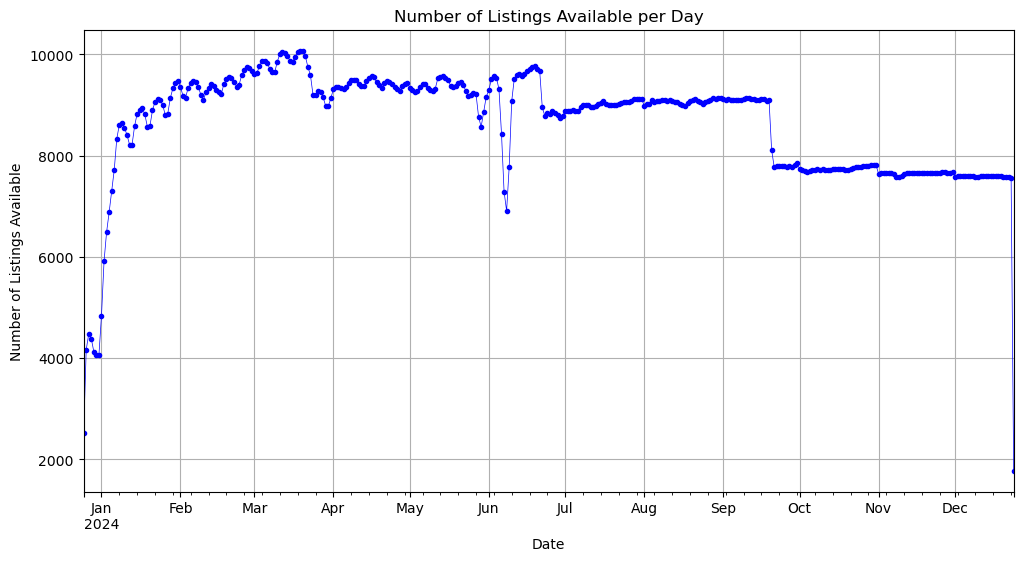

In [19]:
#Convert the 'date' column to datetime and the 'available' column to binary format 
#(1 for available, 0 for not available).
calendar_detailed_df['date'] = pd.to_datetime(calendar_detailed_df['date'])
calendar_detailed_df['available'] = calendar_detailed_df['available'].replace({'t': 1, 'f': 0})

# Group by date and calculate the sum of availability.
availability_per_day = calendar_detailed_df.groupby('date')['available'].sum()

# create the plot
plt.figure(figsize=(12, 6))
availability_per_day.plot(kind='line', marker='o', markersize=3, color='b', linewidth=0.5)  
plt.title('Number of Listings Available per Day')
plt.xlabel('Date')
plt.ylabel('Number of Listings Available')
plt.grid(True)
plt.show()

<div class="alert-info">
we can see that :
    The graph depicting the number of listings available per day throughout the year 2024 in Athens presents a clear pattern of availability. There is a notable peak of availability in the early months, particularly January and February, where the number of available listings reaches close to 10,000. Following this peak, there is a sharp decrease leading into March, which could indicate a seasonal influx of visitors or a common period for hosts to make their properties available.

The availability then stabilizes from April through to October, maintaining a steady level just above 6,000 listings. This plateau suggests a consistent demand and supply of AirBnB accommodations during these months, possibly reflecting the main tourist season in Athens.

Towards the end of the year, there is another notable dip in availability in November, which could be attributed to less tourist activity or hosts withdrawing their listings for personal use or maintenance during the off-season. The availability then slightly recovers in December, although not reaching the highs seen at the beginning of the year.
</div>

# 

### <font color="blue"> (IV) Reviews, Occupacy per Listing, Average Income : </font>

####   A histogram showing the number of reviews per listing. The histogram  bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.                                              
#### Calculation of the average occupacy per listing per month. (To calculate that, we found the average reviews per month and assume that half of the bookings result in reviews).                                                                                                                                                           
#### Then, we assume that each booking is for a three nights stay, and we calculate the average income per month, using the average price charged throughout all listings.





#####  <font color="grey"> we follow these steps: </font>

* ##### <font color="grey"> We will work with the dataframes listings_summary_df and reviews_detailed_df. </font>

* ##### <font color="grey">  Data Type Check and Conversion for 'price' Column: </font>
<font color="grey"> We first checked the data type of the 'price' column in listings_summary_df. If it was not a string, we converted it to a string for further processing. </font>

* ##### <font color="grey"> Cleaning 'price' Column:  </font>
<font color="grey"> The 'price' column was cleaned by removing any dollar signs and commas, then converting the cleaned strings to floats for numerical operations. </font>

* ##### <font color="grey"> Calculation of Average Reviews Per Month:  </font>
<font color="grey"> We calculated the mean value of the 'reviews_per_month' column in listings_summary_df to determine the average number of reviews each listing receives per month. </font>

* ##### <font color="grey"> Assumption for Booking Calculation: </font>
<font color="grey">Based on the assumption that half of the bookings result in reviews, we estimated the average number of bookings per month by doubling the average reviews per month.  </font>

* ##### <font color="grey"> Calculation of Average Income Per Month:  </font>
<font color="grey"> We found the mean of the 'price' column in listings_summary_df to get the average price charged across all listings. We then calculated the average income per month by multiplying the average number of bookings per month by the average price and by 3 (assuming each booking is for a three-night stay) </font>

* ##### <font color="grey">Histogram Creation :  </font>
<font color="grey"> We created a histogram to visualize the distribution of the number of reviews per listing. We collected the counts of reviews per listing from reviews_detailed_df and used these values to plot the histogram. We set the bins of the histogram to range from 0 to the maximum number of reviews rounded up to the nearest hundred, with an edge color defined for better visibility.We plotted the histogram with the appropriate labels for the title, x-axis, and y-axis. We also set the figure size to ensure the plot was clear and easy to read. </font>

# 

Average Income per Month: $1073.22


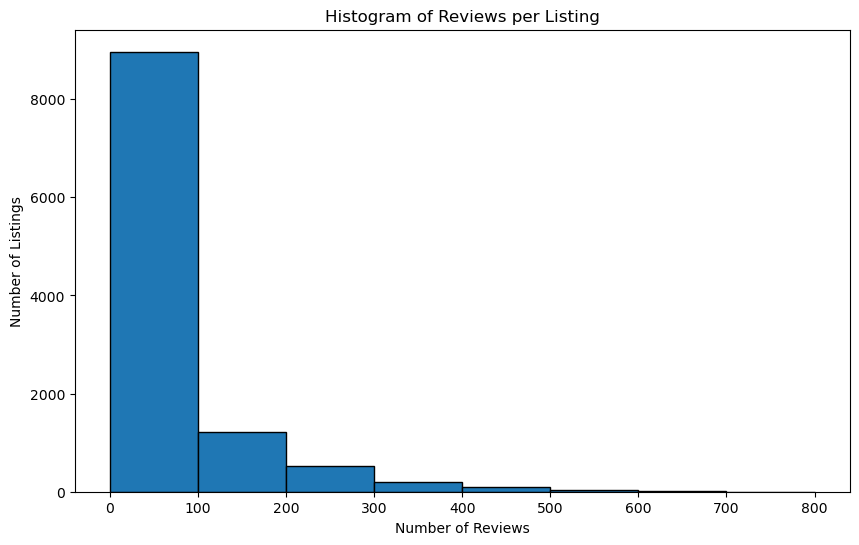

In [20]:
#Data Type Check and Conversion for 'price' Column:if not pd.api.types.is_string_dtype(listings_summary_df['price']):
listings_summary_df['price'] = listings_summary_df['price'].astype(str)

# Cleaning the 'price' column and converting it to numeric form
listings_summary_df['price'] = listings_summary_df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Calculation of the average number of reviews per month per listing.
average_reviews_per_month = listings_summary_df['reviews_per_month'].mean()

# We assume that half of the bookings result in reviews.
average_bookings_per_month = average_reviews_per_month * 2

# Calculation of the average income per month.
average_price = listings_summary_df['price'].mean()
average_income_per_month = average_bookings_per_month * average_price * 3

print(f"Average Income per Month: ${average_income_per_month:.2f}")

# Creation of a histogram for the number of reviews per listing.
reviews_per_listing = reviews_detailed_df['listing_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(reviews_per_listing, bins=range(0, reviews_per_listing.max() + 1, 100), edgecolor='black')
plt.title('Histogram of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.show()

<div class="alert-info">
we can see that :
    The histogram of reviews per listing in the AirBnB data for Athens illustrates that a vast majority of listings have a low number of reviews, with the highest frequency being listings with zero to one hundred reviews. This suggests that either a large number of properties are relatively new to the platform or they do not get booked frequently. The steep decline in frequency as the number of reviews increases indicates that only a small fraction of listings have a high number of reviews, which could be due to longer presence on the platform, higher popularity, or better ratings.

The average income per month calculated to be $1073.22 provides an insight into the potential revenue for an average listing. This assumes that every booking is for a three-night stay and that half of the bookings leave a review. This figure helps us gauge the economic impact of AirBnB listings in Athens and may serve as a benchmark for hosts to compare their earnings against the average.
</div>

# 

### <font color="blue"> (V) Listings per Room Type : </font>

####  The number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, the number of listings per neighrbourhood and room type. 






#####  <font color="grey"> we follow these steps: </font>

* ##### <font color="grey"> We will work with the dataframe listings_summary_df. </font>

* ##### <font color="grey"> Calculation of Listings per Room Type: </font>
<font color="grey">We use the value_counts() method on the room_type column of the listings_summary_df DataFrame to count the number of listings for each room type. </font>

* ##### <font color="grey"> Calculation of Percentage for Each Room Type:  </font>
<font color="grey">We compute the percentages of each room type by dividing the counts by the total sum of listings and then multiplying by 100 to get the percentage. </font>

* ##### <font color="grey"> Display of Counts and Percentages: </font>
<font color="grey"> we printe both the absolute numbers and the percentages of listings for each room type to provide a comprehensive view of their distribution. </font>

* ##### <font color="grey"> Grouping Listings by Neighborhood and Room Type:  </font>
<font color="grey">We employe the groupby() method combined with size() and unstack() on the listings_summary_df DataFrame to count the number of listings for each combination of neighborhood and room type, filling any missing values with zero. </font>

* ##### <font color="grey"> Display of Listings per Neighborhood and Room Type </font>
<font color="grey">  </font>


# 

In [21]:
# Calculation of Listings per Room Type:
room_type_counts = listings_summary_df['room_type'].value_counts()

# Calculation of Percentage for Each Room Type
room_type_percentages = (room_type_counts / room_type_counts.sum()) * 100

# Display of Counts and Percentages
print("Number of Listings per Room Type:")
print(room_type_counts)
print("\nPercentage of Listings per Room Type:")
print(room_type_percentages)

# Grouping Listings by Neighborhood and Room Type
listings_per_neighbourhood_room_type =listings_summary_df.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        

print("\nNumber of Listings per Neighbourhood and Room Type:")
print(listings_per_neighbourhood_room_type)

Number of Listings per Room Type:
room_type
Entire home/apt    11906
Private room        1091
Hotel room           102
Shared room           83
Name: count, dtype: int64

Percentage of Listings per Room Type:
room_type
Entire home/apt    90.320134
Private room        8.276438
Hotel room          0.773782
Shared room         0.629646
Name: count, dtype: float64

Number of Listings per Neighbourhood and Room Type:
room_type                         Entire home/apt  Hotel room  Private room  Shared room
neighbourhood                                                                           
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                                 53           0             0            0
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                               31           0             5            0
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ              709           0           108           13
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                                 94           0             9            0
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                              86 

<div class="alert-info">
we can see that :
    The analysis of the Airbnb listings in Athens has provided information about the room type preferences and their geographical distribution. The majority of listings are categorized as entire homes or apartments, making up over 90% of the total, indicating a market that caters predominantly to travelers seeking private accommodations. Private rooms comprise about 8%, hotel rooms are less than 1%, and shared rooms constitute a minimal percentage, highlighting a lesser demand for shared living spaces.

The distribution is reflective of a trend where visitors prioritize having a space entirely to themselves, which could be driven by the desire for privacy, space, or a full-home experience. The negligible percentage of shared rooms suggests that this type of accommodation is the least preferred among Airbnb users in Athens.

When breaking down the listings by neighborhood and room type, it becomes evident that certain areas have higher concentrations of specific types of listings. For example, "ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ" has the highest number of entire homes/apartments, which aligns with its popularity as a tourist hub.

The variation across neighborhoods in the mix of room types offered could be attributed to the differing character and demand in each area. Some neighborhoods may attract more budget travelers looking for private rooms, while others may be more desirable for tourists who are willing to pay more for a full apartment in a prime location.
</div>

# 

### <font color="blue"> (VI) Prices per Day : </font>

####  Α table with the average price per listing per day and a graph visualizing the table.


# 

Average Price per Listing per Day:
          date       price
0   2023-12-25   88.523767
1   2023-12-26  101.385222
2   2023-12-27  101.385222
3   2023-12-28  101.385222
4   2023-12-29  101.385222
..         ...         ...
361 2024-12-20  101.385222
362 2024-12-21  101.385222
363 2024-12-22  101.385222
364 2024-12-23  101.385222
365 2024-12-24  130.112601

[366 rows x 2 columns]


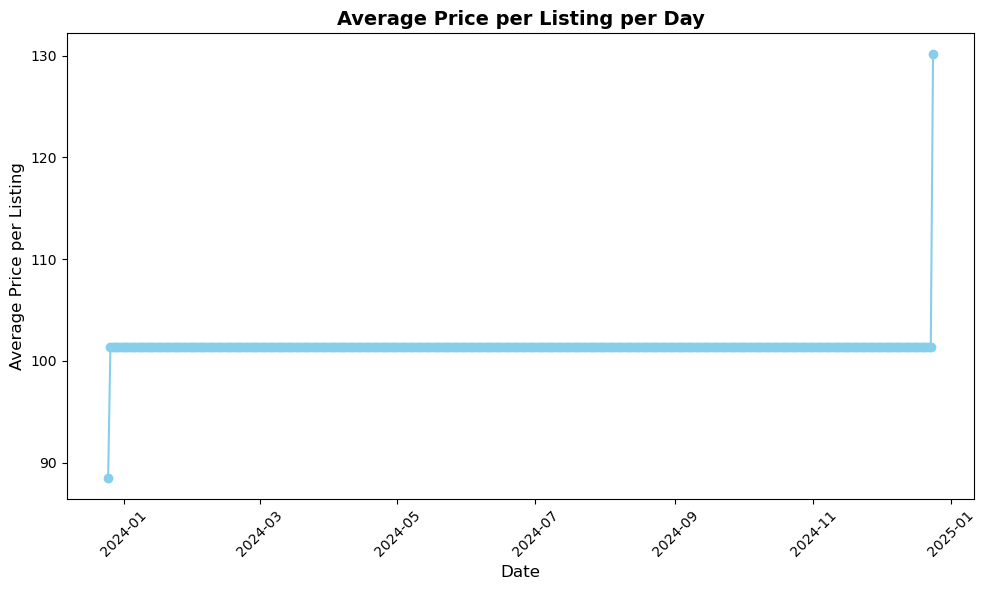

In [22]:

#  Clean the 'price' column to remove '$' and ',' characters
calendar_detailed_df['price'] = calendar_detailed_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'date' column to datetime format 
calendar_detailed_df['date'] = pd.to_datetime(calendar_detailed_df['date'])
 
#  Calculate average price per listing per day
average_price_per_day = calendar_detailed_df.groupby('date')['price'].mean().reset_index()
 
# Print the table
print("Average Price per Listing per Day:")
print(average_price_per_day)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_day['date'], average_price_per_day['price'], marker='o', color='skyblue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price per Listing', fontsize=12)
plt.title('Average Price per Listing per Day', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div class="alert-info">
we can see that :   
The graph shows the average price per listing per day for a period of time. From the graph, it appears that the average price remains constant over time, except for two distinct spikes. One of these spikes shows a dramatic drop to zero, while the other shows a dramatic increase.

The drop to zero could indicate a data error or an outlier. It's unlikely for the average price to actually be zero unless there were no bookings for that day or if there was an error in data collection or processing.
The spike in price at the end of the period could suggest a seasonal increase in prices, a special event that caused a surge in demand, or again, it could be a data anomaly that requires further investigation.
Apart from the two spikes, the prices are stable, which might indicate that there's a consistent demand and supply for the listings, and the pricing strategy does not vary day-to-day.
If the zero price is not a data error, this could be an interesting point for further time series analysis. Understanding what happened on this particular day could provide insights into external factors that impact pricing.
It's important to consider external factors such as holidays, local events, or seasonal trends that could explain these anomalies.    
</div>

# 

### <font color="blue"> (VIΙ) Listings per Host : </font>

####  Α table with the number of listings per host, in descending order. Α a graph that will show the distribution of listings per host, as follows:

We rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, we just add them in sequence. For instance, if there are 10 hosts with one listing each, we add them in the ranking with any order between them.

On the  𝑦 axis we will have the number of listings.

That is, a point  (𝑥,𝑦) will mean that the  𝑥-th highest hosting host has 𝑦 listings.

After we drawn the plot,and  do another one, this time with the  𝑥 axis in logarithmic scale.

#####  <font color="grey"> we follow these steps: </font>

* ##### <font color="grey"> We will work with the dataframe listings_summary_df </font>

* ##### <font color="grey"> Counting Listings Per Host: </font>
<font color="grey"> We used the value_counts() method on the host_id column of the listings_summary_df DataFrame to count how many listings each host has. </font>

* ##### <font color="grey"> Sorting Counts in Descending Order:  </font>
<font color="grey"> The resulting counts were sorted in descending order to rank the hosts from the one with the most listings to the one with the fewest. </font>

* ##### <font color="grey"> Creating a DataFrame for Sorted Counts:  </font>
<font color="grey"> We created a new DataFrame from the sorted counts, labeling the columns as 'Host ID' and 'Number of Listings' to clearly represent the data. </font>

* ##### <font color="grey">Displaying the DataFrame:  </font>
<font color="grey"> The new DataFrame was printed out to show the number of listings associated with each host. </font>

* ##### <font color="grey"> Plotting Distribution of Listings Per Host:  </font>
<font color="grey">  A plot was created to visualize the number of listings per host. Each host was ranked based on the number of listings they have, and the vertical position (y-value) of each point represented the number of listings for that hos</font>

* ##### <font color="grey">Creating a Logarithmic Plot: </font>
<font color="grey">Another plot was created with the same y-values, but this time the x-axis was set to a logarithmic scale. This helps to better visualize the distribution when there is a large range of values, as is often the case with the number of listings per host.  </font>

# 

        Host ID  Number of Listings
0      20104194                 121
1     113548208                 101
2      90390850                  68
3     113353393                  64
4      47267002                  62
...         ...                 ...
5835   69024112                   1
5836   76167139                   1
5837    4155182                   1
5838  541487158                   1
5839  180153653                   1

[5840 rows x 2 columns]


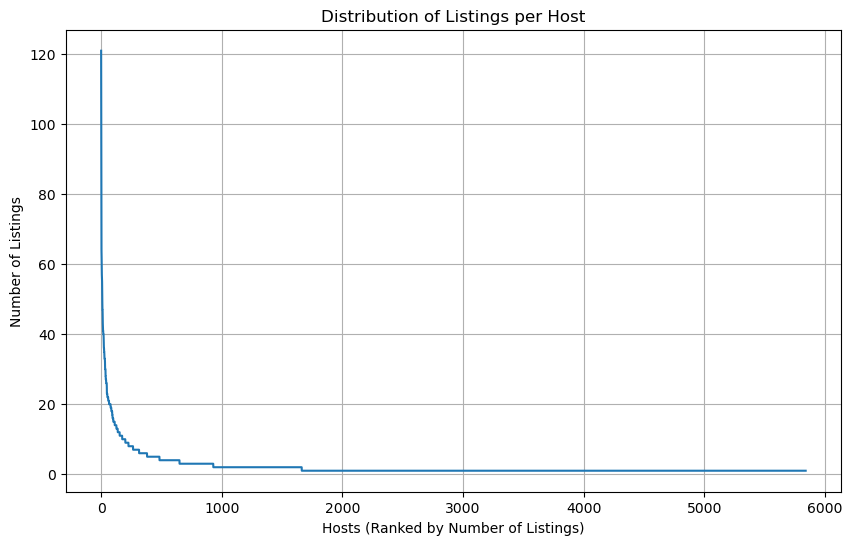

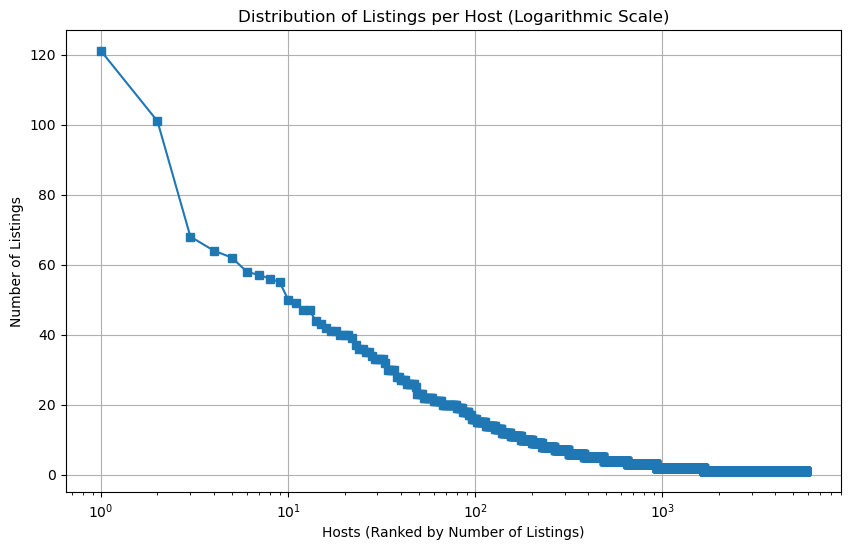

In [23]:
# Count the number of listings per host
listings_per_host = listings_summary_df['host_id'].value_counts()

# Sort the counts in descending order
listings_per_host_sorted = listings_per_host.sort_values(ascending=False)

# Create a DataFrame from the sorted counts
listings_per_host_df = pd.DataFrame({'Host ID': listings_per_host_sorted.index, 'Number of Listings': listings_per_host_sorted.values})

# Display the DataFrame
print(listings_per_host_df)

# Plotting the distribution of listings per host
plt.figure(figsize=(10, 6))
plt.plot(listings_per_host_sorted.values)
plt.xlabel('Hosts (Ranked by Number of Listings)')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings per Host')
plt.grid(True)
plt.show()

# Plotting with a logarithmic x-axis
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(listings_per_host_sorted) + 1), listings_per_host_sorted.values, label='Listings per Host', marker='s')
plt.xscale('log')
plt.xlabel('Hosts (Ranked by Number of Listings)')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings per Host (Logarithmic Scale)')
plt.grid(True)
plt.show()

<div class="alert-info">
we can see that :
    The visual analysis of the number of listings per host in Athens, as displayed in the linear and logarithmic graphs, indicates a highly skewed distribution. A small number of hosts hold a disproportionately large number of listings, with the top host managing 121 properties. This suggests the presence of professional hosts or companies specializing in short-term rentals. The steep drop-off in the number of listings as we move down the ranks of hosts indicates that the vast majority have only a few listings, which is typical of individual property owners or hosts who offer a single home or a few rooms.

The linear graph illustrates this concentration at the high end, but the tail of the distribution—hosts with fewer listings—is not as visible due to the scale. The logarithmic graph, on the other hand, provides a better view of the distribution's tail, revealing that there is a substantial number of hosts with just one or a handful of listings, emphasizing the long-tail nature of the distribution. This suggests a market with a mix of host types, from large-scale operators to individual homeowners sharing their space.
</div>

# 

### <font color="blue"> (VIΙΙ) Visualize Listings : </font>

####   Αn interactive map to show the listings ovelayed on Athens.

We can use the folium library to create the map

The map  shows each listing and on clicking on top of it, the user  see a short description of the listing.

We save it to an external HTML file that can be opened by any browser.

#####  <font color="grey"> we follow these steps: </font>

* ##### <font color="grey"> We will work with the dataframe listings_summary_df and neighbourhoods_geojson_df </font>

* ##### <font color="grey"> Import Libraries:</font>
<font color="grey"> We imported the necessary libraries, including folium for map generation and geopandas for handling geographic data.</font>

* ##### <font color="grey"> Create a Base Map:</font>
<font color="grey"> We initialized a folium Map object centered on Athens with a specified starting zoom level and a maximum zoom level to control the zoom functionality of the map.</font>

* ##### <font color="grey"> Add GeoJSON Layer:</font>
<font color="grey"> we addded a GeoJSON layer to the map to outline the neighborhoods of Athens, which provides a geographic context for the Airbnb listings.</font>

* ##### <font color="grey"> Initialize Marker Cluster:</font>
<font color="grey"> we created a MarkerCluster object, which groups the markers into clustered layers to manage the display of a large number of points and improve the user experience.</font>

* ##### <font color="grey"> Add Listings as Markers:</font>
<font color="grey"> we iterated over each row in the listings_summary_df DataFrame and created a marker for each listing. The marker includes a popup with a short description of the listing, including its name, room type, price, and minimum nights.</font>

* ##### <font color="grey"> Save the Map to HTML: </font>
<font color="grey"> we saved the interactive map to an external HTML file, which can be opened with any web browser. The file path for the output is specified, and the map is saved using the save() method of the folium Map object.</font>

* ##### <font color="grey"> Confirmation Message: </font>
<font color="grey"> we printed a confirmation message with the file path to indicate where the map has been saved.</font>

# 

In [24]:
# Υποθέτοντας ότι έχετε ένα dataframe με όνομα df
na_count = listings_summary_df.isna().sum()
print(na_count)

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               13182
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               366
minimum_nights                        0
number_of_reviews                     0
last_review                        2114
reviews_per_month                  2114
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                             661
dtype: int64


In [25]:
# Υπολογισμός της μέσης τιμής της στήλης 'price'
mean_price = listings_summary_df['price'].mean()

# Rounding the statistics to one decimal place
mean_price = mean_price.round(1)

# Γέμισμα των NA τιμών με τη μέση τιμή
listings_summary_df['price'].fillna(mean_price, inplace=True)

In [26]:
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd


#  Create a map centered on Athens
map_athens = folium.Map(location=[37.9838, 23.7275], zoom_start=12, max_zoom=15)

# Adding GeoJSON to the map
folium.GeoJson(
    neighbourhoods_geojson_df,
    name='geojson'
).add_to(map_athens)

# Creating the MarkerCluster
marker_cluster = MarkerCluster().add_to(map_athens)

# Adding Airbnb listings as markers on the map using MarkerCluster
for idx, row in listings_summary_df.iterrows():
    popup_content = folium.Html(
        f"<b>{row['name']}</b><br>"
        f"Τύπος: {row['room_type']}<br>"
        f"Τιμή: {row['price']}<br>"
        f"Διανυκτερεύσεις: {row['minimum_nights']}",
        script=True
    )
    popup = folium.Popup(popup_content, max_width=300)
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup
    ).add_to(marker_cluster)

# Define the relative path for the output HTML file
output_file_name = 'athens_airbnb_listings.html'
output_path = os.path.join(relative_path, output_file_name)

# Save the map to the HTML file using the relative path
map_athens.save(output_path)

print(f"The map has been saved to: {output_path}")




The map has been saved to: C:\Users\eleni\Analytics Practicum I -louridas\assignment\athens_airbnb_listings.html


<div class="alert-info">
we can see that :The interactive map created using the Folium library provides a comprehensive visualization of Airbnb listings across Athens, highlighting the density and distribution of properties available for rent. From the map, it's evident that listings are concentrated in certain neighborhoods, potentially reflecting areas with higher tourist interest or residential attractiveness.

When a user clicks on a listing marker, they receive immediate, valuable information such as the type of room, price, and minimum stay requirements, enhancing the user experience by allowing potential renters to quickly assess the options that fit their criteria. This feature adds an interactive element to the property search, making the map a practical tool for both analysis and operational use.

The use of a MarkerCluster is particularly effective in managing the visual clutter that would otherwise result from thousands of individual markers. It improves the map's readability and user-friendliness by grouping listings and only displaying the details as the user zooms in.

</div>